Бербер Кирилл, 317 группа 

# Машинное обучение, ВМК МГУ #


## Практическое задание 1. Метод опорных векторов и аппроксимация ядер##
Общая информация
Дата выдачи: 23:59 MSK 05.03.2021

Мягкий дедлайн: 23:59MSK 19.03.2021 **(за каждый день просрочки снимается 1 балл)**

Жесткий дедлайн: 23:59MSK 26.03.2021

**Оценивание и штрафы** 
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимальная оценка за работу (без учёта бонусов) — **10 баллов**.

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи ##
Задания сдаются через систему anytask. Посылка должна содержать:

Ноутбук homework-practice-01-random-features-Username.ipynb
Username — ваша фамилия и имя на латинице именно в таком порядке

Напоминание об оформлении и выполнении ноутбука

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**

* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае **-1 балл**

* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. В противном случае **-0.5 балла**
_________________________________________________________________________________________________________________
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
__________________________________________________________________________________________________________________

* Про графики. Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать

* должно быть название (plt.title) графика; В противном случае – -0.05 балла

* на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); В противном случае – -0.025 балла за каждую ось

* должны быть подписаны единицы измерения (если это возможно); В противном случае – -0.025 балла за каждую ось

* все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; В противном случае – -0.05 балла

* подписи тиков на осях не должны сливаться как на одной оси, так и между ними; В противном случае – -0.025 балла за каждую ось

* если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); В противном случае – -0.05 балла

* все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); В противном случае – -0.05 балла

* если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);

* графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.

* при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.

## О задании## 
На занятиях мы подробно обсуждали метод опорных векторов (SVM). В базовой версии в нём нет чего-то особенного — мы всего лишь используем специальную функцию потерь, которая не требует устремлять отступы к бесконечности; ей достаточно, чтобы отступы были не меньше +1. Затем мы узнали, что SVM можно переписать в двойственном виде, который, позволяет заменить скалярные произведения объектов на ядра. Это будет соответствовать построению модели в новом пространстве более высокой размерности, координаты которого представляют собой нелинейные модификации исходных признаков.

Ядровой SVM, к сожалению, довольно затратен по памяти (нужно хранить матрицу Грама размера $d \times d$) и по времени (нужно решать задачу условной оптимизации с квадратичной функцией, а это не очень быстро). Мы обсуждали, что есть способы посчитать новые признаки $\tilde \varphi(x)$ на основе исходных так, что скалярные произведения этих новых $\langle \tilde \varphi(x), \tilde \varphi(z) \rangle$ приближают ядро $K(x, z)$.

Мы будем исследовать аппроксимации методом Random Fourier Features (RFF, также в литературе встречается название Random Kitchen Sinks) для гауссовых ядер. Будем использовать формулы, которые немного отличаются от того, что было на лекциях (мы добавим сдвиги внутрь тригонометрических функций и будем использовать только косинусы, потому что с нужным сдвигом косинус превратится в синус):$$\tilde \varphi(x) = (
\cos (w_1^T x + b_1),
\dots,
\cos (w_n^T x + b_n)
),$$где $w_j \sim \mathcal{N}(0, 1/\sigma^2)$, $b_j \sim U[-\pi, \pi]$.

На новых признаках $\tilde \varphi(x)$ мы будем строить любую линейную модель.

Можно считать, что это некоторая новая парадигма построения сложных моделей. Можно направленно искать сложные нелинейные закономерности в данных с помощью градиентного бустинга или нейронных сетей, а можно просто нагенерировать большое количество случайных нелинейных признаков и надеяться, что быстрая и простая модель (то есть линейная) сможет показать на них хорошее качество. В этом задании мы изучим, насколько работоспособна такая идея.

## Алгоритм ##
Вам потребуется реализовать следующий алгоритм:

1. Понизить размерность выборки до new_dim с помощью метода главных компонент.

2. Для полученной выборки оценить гиперпараметр $\sigma^2$ с помощью эвристики (рекомендуем считать медиану не по всем парам объектов, а по случайному подмножеству из где-то миллиона пар объектов):$$\sigma^2 = \text{median}_{i, j = 1, \dots, \ell, i \neq j} \left\{\sum_{k = 1}^{d} (x_{ik} - x_{jk})^2 \right\}$$ **Замечание:** обратите внимание на $i \neq j$, без этого оценка медианы может быть смещена, а также без этого будут сниматься баллы.

3. Сгенерировать n_features наборов весов $w_j$ и сдвигов $b_j$.

4. Сформировать n_features новых признаков по формулам, приведённым выше.

5. Обучить линейную модель (логистическую регрессию или SVM) на новых признаках.

6. Повторить преобразования (PCA, формирование новых признаков) к тестовой выборке и применить модель.

7. Тестировать алгоритм мы будем на данных Fashion MNIST. Ниже код для их загрузки и подготовки.

In [8]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\user\anaconda3\lib\site-packages (2.4.1)
Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install tensorflow-gpu

^C

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys

sys.path

sys.executable

'C:\\Users\\User\\anaconda3\\python.exe'

In [5]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
 pip install --user --upgrade tensorflow-gpu

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

**из-за проблем с керасом я решил скачать этот датасет и загрузить вручную. С помощью небольших преобразований получить то, что требовалось с помощью from keras.datasets import fashion_mnist**

In [3]:
facion_mnist_train = pd.read_csv('fashion-mnist_train.csv', index_col=0)

In [4]:
facion_mnist_test = pd.read_csv('fashion-mnist_test.csv', index_col=0)

In [23]:
facion_mnist_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
0,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0


In [30]:
x_train = facion_mnist_train.to_numpy().reshape(facion_mnist_train.shape[0], -1)
x_train.shape

(60000, 784)

In [29]:
y_train = facion_mnist_train.index.values
y_train.shape

(60000,)

In [32]:
x_test = facion_mnist_test.to_numpy().reshape(facion_mnist_test.shape[0], -1)
x_test.shape

(10000, 784)

In [34]:
y_test = facion_mnist_test.index.values
y_test.shape

(10000,)

In [35]:
# Attention! Кажется, под python3.9 импортнуть керас будет трудно (стабильный тензорфлоу requires Python 3.5–3.8, pip and venv >= 19.0)
#import keras
#from keras.datasets import fashion_mnist
#(x_train_pics, y_train), (x_test_pics, y_test) = fashion_mnist.load_data()
#x_train = x_train_pics.reshape(x_train_pics.shape[0], -1)
#x_test = x_test_pics.reshape(x_test_pics.shape[0], -1)

**ВАЖНОЕ ЗАМЕЧАНИЕ:**

Датасет по умолчанию хранится в типе 'uint8', вследствие чего при ручном подсчете дисперсии переменные переполняются и вы получаете неадекватные результаты. Бороться с этим можно преобразованием исходных данных к типу 'float'. Еще один хороший вариант – использовать специализированные функции из библиотек numpy / scipy и, в частности, **scipy.spatial.distance_matrix.**

Ниже приводим подтверждающий пример.

In [37]:
type(x_train)

numpy.ndarray

In [40]:
type(x_train[0,0])

numpy.int64

**из-за того, что тип int64 числа получаются одинаковые, но в ходе решения я все равно буду приводить к .astype(float)**

In [44]:
import numpy as np

indices = np.random.choice(x_train.shape[0], size=2000)
print(np.median(np.sum((x_train[indices[:1000]].astype(float) - x_train[indices[1000:]]).astype(float) ** 2, axis=1)))

print(np.median(np.sum((x_train[indices[:1000]] - x_train[indices[1000:]]) ** 2, axis=1)))

8681049.5
8681049.5


**Задание 1. (5 баллов)**

А) (4 балла) Реализуйте алгоритм, описанный выше. Можете воспользоваться шаблоном класса ниже или написать свой интерфейс.

Ваша реализация должна поддерживать следующие опции:

1. Возможность задавать значения параметров new_dim (по умолчанию 50) и n_features (по умолчанию 1000).
2. Возможность включать или выключать предварительное понижение размерности с помощью метода главных компонент.
3. Возможность выбирать тип линейной модели (логистическая регрессия или SVM с линейным ядром).

**Важно! За несоответствия будут сниматься баллы:**

 * Так как мы работаем с линейными моделями, вам необходимо делать нормализацию данных.
 * Оценка гиперпраметра распределения и построение нового датасета должны быть без питоновских циклов (можно все запрограммировать векторно, используя numpy)
 
**Б) (1 балл)** Протестируйте на данных Fashion MNIST, сформированных кодом выше. Если на тесте у вас получилась доля верных ответов не ниже **0.84 с параметрами по умолчанию**, то вы всё сделали правильно.

Подсказка

* Использование метода без PCA и без нормализации признаков перед генерацией весов может дать неожиданные результаты. Сами подумайте, почему так может происходить :)

In [165]:
import warnings
warnings.filterwarnings('ignore')

In [170]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


class RFFPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, n_features=1000, new_dim=50, use_PCA=True, classifier='logreg'):
        """        
        Implements pipeline, which consists of PCA decomposition,
        Random Fourier Features approximation and linear classification model.
        
        n_features, int: amount of synthetic random features generated with RFF approximation.

        new_dim, int: PCA output size.
        
        use_PCA, bool: whether to include PCA preprocessing.
        
        classifier, string: either 'svm' or 'logreg', a linear classification model to use on top of pipeline.
        
        Feel free to edit this template for your preferences.    
        """
        self.n_features = n_features
        self.use_PCA = use_PCA
        self.new_dim = new_dim
        self.classifier = classifier
        
    def fit(self, X, y):
        """
        Fit all parts of algorithm (PCA, RFF, Classification) to training set.
        """
        # Your code here: (￣▽￣)/♫•*¨*•.¸¸♪
        #PCA
        if (self.use_PCA == True):
            self.pca = PCA(n_components = self.new_dim) 
            X = self.pca.fit_transform(X)
            #print('X_shape', X.shape)
        #нормировка
        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)
        #сигма
        posl = np.arange(789)
        flag = True
        vec = np.random.choice(posl, 1000001)
        while(flag): 
            diff = np.ediff1d(vec)
            vec[np.where(diff == 0)] = np.random.choice(posl, 1)
            flag = np.any(np.any(np.diff(vec) == 0))
        
        mas = X[vec]
        diff_mas = np.diff(mas, axis = 0)**2 
        sigma_2 = np.median(np.sum(diff_mas, axis = 1))
        self.b = np.random.uniform(-np.pi,np.pi, size=(1, self.n_features))
        self.W = np.random.normal(0, 1 / sigma_2, size=(X.shape[1], self.n_features))
        #print('X', X.shape, 'W', self.W.shape, 'b', self.b.shape)
        X = np.cos(X @ self.W  + self.b) #RFF
        
        self.scaler2 = StandardScaler()
        X = self.scaler2.fit_transform(X)
        if (self.classifier == 'logreg'):
            self.clf = LogisticRegression(max_iter = 500)
            self.clf.fit(X, y)
        elif(self.classifier == 'svm'):
            self.clf = svm.SVC()
            self.clf.fit(X, y)
        
        return self

    def predict_proba(self, X):
        """
        Apply pipeline to obtain scores for input data.
        """
        # Your code here: (￣▽￣)/♫•*¨*•.¸¸♪
        if (self.use_PCA == True):
            X = self.pca.transform(X)
        X = self.scaler.transform(X)
        X = np.cos(X @self.W + self.b)
        X = self.scaler2.transform(X)
        if (self.classifier == 'logreg'):
            res = self.clf.predict_proba(X)
        elif(self.classifier == 'svm'):
            res = self.clf.predict_proba(X)
        return res
        
    def predict(self, X):
        """
        Apply pipeline to obtain discrete predictions for input data.
        """
        # Your code here: (￣▽￣)/♫•*¨*•.¸¸♪
        if (self.use_PCA == True):
            X = self.pca.transform(X)
        X = self.scaler.transform(X)
        X = np.cos(X @self.W + self.b)
        X = self.scaler2.transform(X)
        if (self.classifier == 'logreg'):
            res = self.clf.predict(X)
        elif(self.classifier == 'svm'):
            res = self.clf.predict(X)
        return res

In [171]:
RFFP = RFFPipeline()
RFFP.fit(x_train, y_train)
a = RFFP.predict(x_test)

print('res', np.sum(a == y_test) / len(a))

res 0.8855


0.8855 - хорошее число

In [103]:
flag = True
f = np.arange(7)
a = np.array([1, 1, 1, 1])
while(flag):
    d = np.diff(a)
    print('d', d)
    a[np.where(d == 0)] = np.random.choice(f, 1)
    flag = np.any(np.diff(a) == 0)
    print('res', a)

d [0 0 0]
res [6 6 6 1]
d [ 0  0 -5]
res [3 3 6 1]
d [ 0  3 -5]
res [2 3 6 1]


**Задание 2. (3 балла)**

Сравните следующие подходы: (2.5 балла)

* Подход со случайными признаками vs обучение линейного SVM на исходных признаках.
* Подход со случайными признаками vs обучение ядрового SVM на исходных признаках.
* Подход со случайными признаками vs вариант, в котором вы понижаете размерность с помощью PCA и обучаете градиентный бустинг. * Используйте одну из реализаций CatBoost/LightGBM/XGBoost
* Не забудьте в этом случае подобрать число деревьев и длину шага.

*Сделайте выводы:*  **(0.5 баллов)**

* Насколько идея со случайными признаками работает?
* Сравните как с точки зрения качества, так и с точки зрения скорости обучения и применения.

**Важные замечания**

* Подход по случайными признаками тестируйте в двух вариантах линейной модели. То есть у вас должно получиться всего 6 пар сравнений.
* В подходе со случайными признаками в этом задании можно оставиь все параметры, кроме типа модели, по умолчанию.
____________________________________________________________________________________________________________
* Ядровой SVM может очень долго обучаться, поэтому можно делать любые разумные вещи для ускорения: брать подмножество объектов из обучающей выборки, например.
* Если вы решили брать подвыборку для какого-то сравнения, то следите за тем, чтобы оба метода обучались **на одинаковом датасете**. Например, сравнивать подход со случайными признаками, обучая его на всем датасете, против ядрового SVM на подвыборке -- некорректно. Тестирование так же должно происходить на одинаковом датасете.
* Можно в начале этой секции выделить подвыборку и использовать ее для всех экспериментов, если вам это удобно. Необходимо оставить в таком случае хотя бы 10000 объектов. **За меньшее число будут сниматься баллы**
_____________________________________________________________________________________________________________
* При сравнении по времени не забывайте смотреть, во сколько потоков реализован алгоритм. Например, сравнивать алгоритм, с параметром n_jobs=-1 (задействовать все возможные потоки) с однопоточным алгоритмом по времени будет некорректно
* Замеряйте время не только обучения, но и обучения + препроцессинга, если он есть (считайте, что формирование признаков в подходе со случайными признаками входит в понятие алгоритма). Так вы сможете более точно проанализировать временные характеристики подходов.
______________________________________________________________________________________________________________
* Переберите хотя бы 10 различных значений количества деревьев (в разумных пределах и с разумным шагом), хотя бы 5 значений параметра learning rate (по логарифмической шкале). Если не знаете, в каких пределах пребирать, то можно найти материалы по соответствующим градиентным бустингам с разбором того, как обычно параметры перебирают.
* Перед использованием линейного подхода необходимо нормализовывать признаки (это обычная практика при применении линейных методов, как вы знаете)
* Отображать результаты лучше всего будет в виде таблички (pandas DataFrame например), где отображены результаты как качеств всех алгоритмов, так и времена работы. Можно использовать графическое отображение через bar_plot. Можно также текстом.
_______________________________________________________________________________________________________________
* Здесь и далее нигде не должно быть сильных просадок по качеству. То есть, если вы получили где-то качество 0.2/0.3/0.4 итд --- это повод задуматься, что где-то у вас есть бага. Во всех экспериментах мы ожидаем качество на тесте не ниже 0.75. **За меньшее качество будут сниматься баллы**

In [188]:
a = np.arange(60000)
rand_vec_15k = np.random.choice(a, 15000, replace=False)

In [189]:
x_train_short = x_train[rand_vec_15k]
y_train_short = y_train[rand_vec_15k]

In [194]:
import time 
start_time = time.time()
RFFP = RFFPipeline()
RFFP.fit(x_train_short, y_train_short)
a = RFFP.predict(x_test)

t = time.time() - start_time
print('random features time 15k objects logreg:', t, 'sec')
print('random features accur 15k objects logreg:', np.sum(a == y_test) / len(a))

random features time 15k objects logreg: 42.70691776275635 sec
random features accur 15k objects logreg: 0.8612


In [197]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
start_time = time.time()
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(x_train_short, y_train_short)
aLinearSVC = clf.predict(x_test)
tLinearSVC = time.time() - start_time
print('LinearSVC time 15k objects:', tLinearSVC, 'sec')
print('LinearSVC accur 15k objects:', np.sum(aLinearSVC == y_test) / len(aLinearSVC))

LinearSVC time 15k objects: 73.09864592552185 sec
LinearSVC accur 15k objects: 0.8047


**первое сравнение: RF logreg vs LinearSVM**

1. random features time 15k objects logreg: 42.70 sec

2. random features accur 15k objects logreg: 0.8612

3. LinearSVC time 15k objects: 73.10 sec

4. LinearSVC accur 15k objects: 0.8047

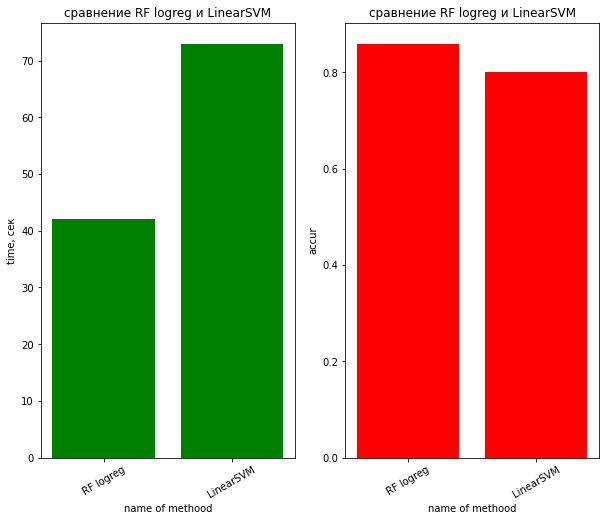

In [265]:
graph = plt.figure(figsize = (10,8))
#ax = graph.add_axes([0,0,1,1])
names = ['RF logreg', 'LinearSVM']
time = [42, 73]
accur = [0.86, 0.80]
#ax.bar(names, time, color = 'g')
#plt.xticks(rotation=30)
#plt.ylabel('time, сек')
#plt.xlabel('name of methood')
#plt.show()

plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title('сравнение RF logreg и LinearSVM')
plt.bar(names, time, color = 'g')
plt.xticks(rotation=30)

plt.xlabel('name of methood')
plt.ylabel('time, сек')


plt.subplot(1, 2, 2)

plt.title('сравнение RF logreg и LinearSVM')
plt.bar(names, accur, color = 'r')
plt.xticks(rotation=30)
plt.xlabel('name of methood')
plt.ylabel('accur')

plt.show()

In [195]:
import time 
start_time = time.time()
RFFP = RFFPipeline(classifier='svm')
RFFP.fit(x_train_short, y_train_short)
a = RFFP.predict(x_test)
t = time.time() - start_time
print('random features time 15k objects svm:', t, 'sec')
print('random features accur 15k objects svm:',  np.sum(a == y_test) / len(a))

random features time 15k objects svm: 212.89214086532593 sec
random features accur 15k objects svm: 0.8762


In [198]:
print('LinearSVC time 15k objects:', tLinearSVC, 'sec')
print('LinearSVC accur 15k objects:', np.sum(aLinearSVC == y_test) / len(aLinearSVC))

LinearSVC time 15k objects: 73.09864592552185 sec
LinearSVC accur 15k objects: 0.8047


**второе сравнение: RF svm vs LinearSVM**
1. random features time 15k objects svm: 212.89 sec
2. random features accur 15k objects svm: 0.8762
3. LinearSVC time 15k objects: 73.10 sec
4. LinearSVC accur 15k objects: 0.8047

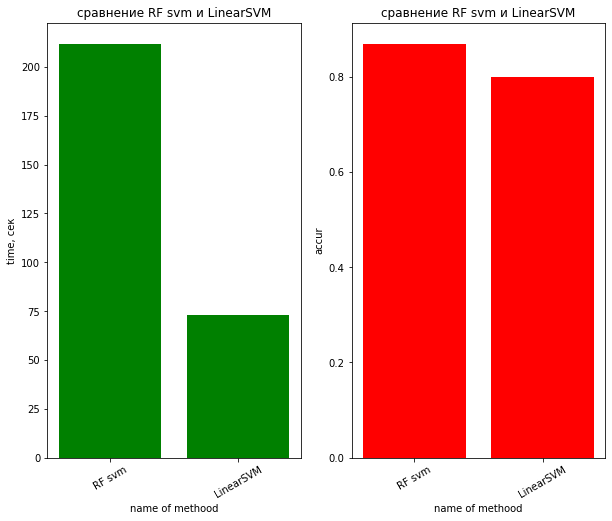

In [285]:
graph = plt.figure(figsize = (10,8))
#ax = graph.add_axes([0,0,1,1])
names = ['RF svm', 'LinearSVM']
time = [212, 73]
accur = [0.87, 0.80]
#ax.bar(names, time, color = 'g')
#plt.xticks(rotation=30)
#plt.ylabel('time, сек')
#plt.xlabel('name of methood')
#plt.show()

plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title('сравнение RF svm и LinearSVM')
plt.bar(names, time, color = 'g')
plt.xticks(rotation=30)

plt.xlabel('name of methood')
plt.ylabel('time, сек')


plt.subplot(1, 2, 2)

plt.title('сравнение RF svm и LinearSVM')
plt.bar(names, accur, color = 'r')
plt.xticks(rotation=30)
plt.xlabel('name of methood')
plt.ylabel('accur')

plt.show()

In [201]:
from sklearn.svm import SVC
start_time = time.time()
clfkernel = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
clfkernel.fit(x_train_short, y_train_short)
aclfkernel = clfkernel.predict(x_test)
tclfkernel = time.time() - start_time
print('kernel svm time 15k objects:', tclfkernel, 'sec')
print('kernel svm accur 15k objects:',  np.sum(aclfkernel == y_test) / len(aclfkernel))

kernel svm time 15k objects: 133.50059700012207 sec
kernel svm accur 15k objects: 0.8704


**третье сравнение: RF logreg vs kernel SVM**
1. random features time 15k objects logreg: 42.70 sec
2. random features accur 15k objects logreg: 0.8612
3. kernel svm time 15k objects: 133.50 sec
4. kernel svm accur 15k objects: 0.8704

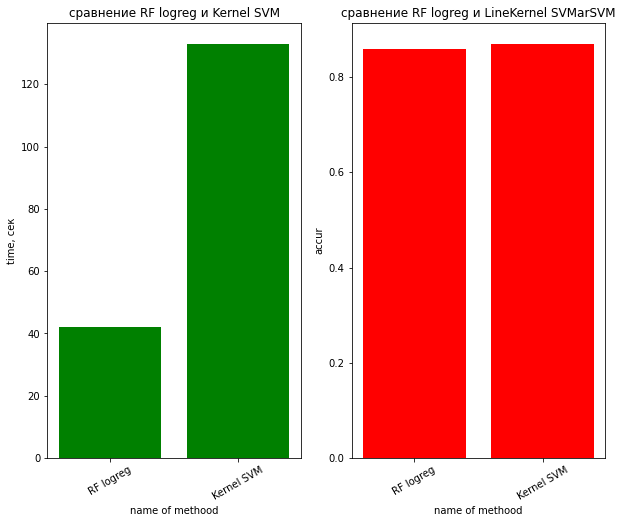

In [286]:
graph = plt.figure(figsize = (10,8))
#ax = graph.add_axes([0,0,1,1])
names = ['RF logreg', 'Kernel SVM']
time = [42, 133]
accur = [0.86, 0.87]
#ax.bar(names, time, color = 'g')
#plt.xticks(rotation=30)
#plt.ylabel('time, сек')
#plt.xlabel('name of methood')
#plt.show()

plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title('сравнение RF logreg и Kernel SVM')
plt.bar(names, time, color = 'g')
plt.xticks(rotation=30)

plt.xlabel('name of methood')
plt.ylabel('time, сек')


plt.subplot(1, 2, 2)

plt.title('сравнение RF logreg и LineKernel SVMarSVM')
plt.bar(names, accur, color = 'r')
plt.xticks(rotation=30)
plt.xlabel('name of methood')
plt.ylabel('accur')

plt.show()

In [203]:
print('kernel svm time 15k objects:', tclfkernel, 'sec')
print('kernel svm accur 15k objects:',  np.sum(aclfkernel == y_test) / len(aclfkernel))

kernel svm time 15k objects: 133.50059700012207 sec
kernel svm accur 15k objects: 0.8704


**четвертое сравнение: RF svm vs kernel SVM**
1. random features time 15k objects svm: 212.89 sec
2. random features accur 15k objects svm: 0.8762
3. kernel svm time 15k objects: 133.50 sec
4. kernel svm accur 15k objects: 0.8704

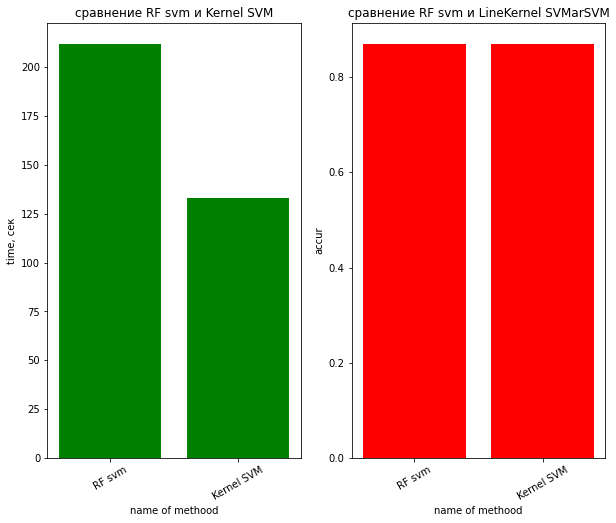

In [287]:
graph = plt.figure(figsize = (10,8))
#ax = graph.add_axes([0,0,1,1])
names = ['RF svm', 'Kernel SVM']
time = [212, 133]
accur = [0.87, 0.87]
#ax.bar(names, time, color = 'g')
#plt.xticks(rotation=30)
#plt.ylabel('time, сек')
#plt.xlabel('name of methood')
#plt.show()

plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title('сравнение RF svm и Kernel SVM')
plt.bar(names, time, color = 'g')
plt.xticks(rotation=30)

plt.xlabel('name of methood')
plt.ylabel('time, сек')


plt.subplot(1, 2, 2)

plt.title('сравнение RF svm и LineKernel SVMarSVM')
plt.bar(names, accur, color = 'r')
plt.xticks(rotation=30)
plt.xlabel('name of methood')
plt.ylabel('accur')

plt.show()

In [275]:
from lightgbm import LGBMClassifier
import time 
list_time = []
list_of_accur = []
list_of_trees = [5, 10, 30, 50, 100, 200, 400, 600, 800, 1000]
pca = PCA(n_components = 50) 
X_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)
for i in list_of_trees:
    print('i am working', i)
    start_time = time.time()
    clf_param = LGBMClassifier(n_estimators = i)
    clf_param.fit(X_train_new, y_train)
    t = time.time() - start_time
    s = clf_param.predict(x_test_new)
    list_time += [t]
    list_of_accur += [np.sum(s == y_test) / len(s)]

i am working 5
i am working 10
i am working 30
i am working 50
i am working 100
i am working 200
i am working 400
i am working 600
i am working 800
i am working 1000


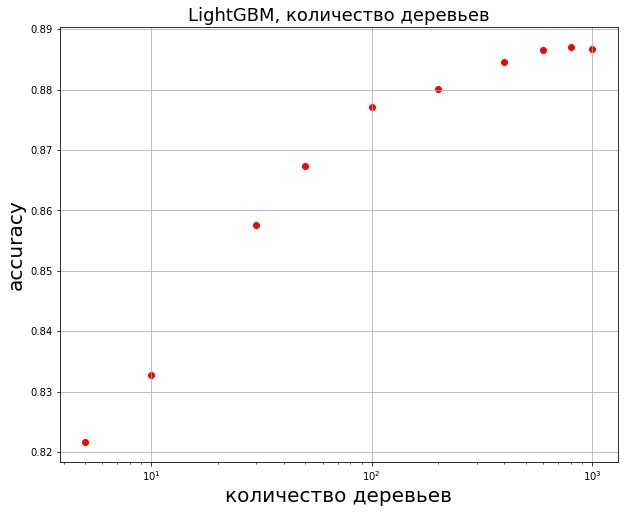

In [277]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.scatter(list_of_trees, list_of_accur, color = 'r')
ax.set_ylabel('accuracy', size = 20)
ax.set_xlabel('количество деревьев', size = 20)
ax.grid()

plt.xscale("log")
ax.set_title('LightGBM, количество деревьев', size = 18 )
#plt.savefig('C:/Users/User/Jupiter_notebook/task4_GB_nest1.pdf')
plt.show()

In [278]:
list_time

[0.6036221981048584,
 0.9713413715362549,
 2.254394292831421,
 3.725870370864868,
 7.417140960693359,
 14.048612117767334,
 40.92231512069702,
 47.664931535720825,
 63.218770265579224,
 74.61809206008911]

лучшее значение количества деревьев - 800

In [280]:
import time 
list_time = []
list_of_accur = []
list_of_learn = [0.1, 0.3, 0.5, 0.7,0.9]
pca = PCA(n_components = 50) 
X_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)
for i in list_of_learn:
    print('i am working', i)
    start_time = time.time()
    clf_param = LGBMClassifier(n_estimators = 800, learning_rate = i)
    clf_param.fit(X_train_new, y_train)
    t = time.time() - start_time
    s = clf_param.predict(x_test_new)
    list_time += [t]
    list_of_accur += [np.sum(s == y_test) / len(s)]

i am working 0.1
i am working 0.3
i am working 0.5
i am working 0.7
i am working 0.9


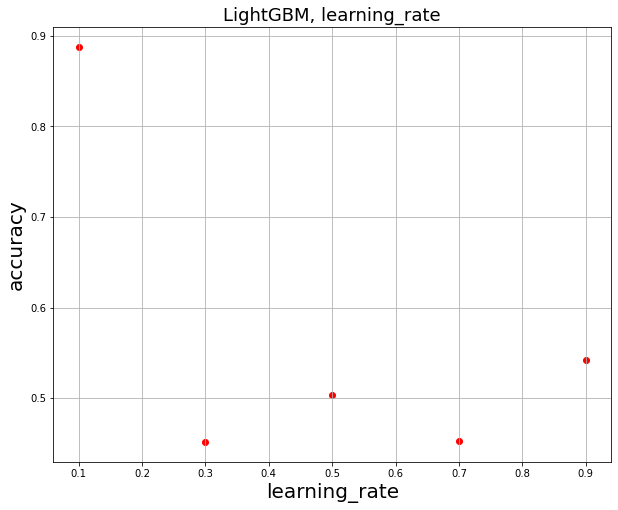

In [281]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.scatter(list_of_learn, list_of_accur, color = 'r')
ax.set_ylabel('accuracy', size = 20)
ax.set_xlabel('learning_rate', size = 20)
ax.grid()
#plt.xscale("log")
#ax.legend(prop={'size': 15})
ax.set_title('LightGBM, learning_rate', size = 18)
#plt.savefig('C:/Users/User/Jupiter_notebook/task4_GB_learn_rate_rmse.pdf')
plt.show()

лучшее качество получилось при learning_rate = 0.1

In [283]:
print('accuracy LightGBM', list_of_accur[0])
print('time LightGBM', list_time[0], 'sec')

accuracy LightGBM 0.8878
time LightGBM 61.51825761795044 sec


**пятое сравнение: lohreg svm vs LightGBM**
1. random features time 15k objects logreg: 42.70 sec 
2. random features accur 15k objects logreg: 0.8612
3. LightGBM time 15k objects: 61.51 sec
4. LightGBM accur 15k objects: 0.88

**шестое сравнение: RF svm vs LightGBM**
1. random features time 15k objects svm: 212.89 sec
2. random features accur 15k objects svm: 0.8762
3. LightGBM time 15k objects: 61.51 sec
4. LightGBM accur 15k objects: 0.88

Видно, что лучшее качество дает лучшее качество, но работает относительно долго
LightGBM и lohreg svm работали быстрее всего, но деревья давали еще и лучшее качество, 

однако для этого их нужно было настроить (подобрать правильные параметры)

**Задание 3. (2 балла)**

Проведите эксперименты **(1.5 балла)**, после которых вы сможете ответить на следующие вопросы **(0.5 балла)**:

1. Помогает ли предварительное понижение размерности с помощью PCA?
2. Как зависит итоговое качество от n_features? Выходит ли оно на плато при росте n_features?
3. Важно ли, какую модель обучать — логистическую регрессию или SVM?

**Замечания:**

* В п.2 необходимо перебрать хотя бы 30 значений признаков по разумной сетке, затрагивающей значение в 3000 признаков (или максимальное из того, что позволяет ваш компьтер за разумное время). **За меньшее число признаков и меньшее максимальное значение будут сниматься баллы**
* В п.2 используйте логистическую регрессию
* В п.2 отобразите качества (accuracy_score) на обучении и на тесте в виде графиков на одном полотне. **За отсутствие будут сниматься баллы**
* Везде делайте замеры по времени и результаты включайте в выводы. **За отсутствие будут сниматься баллы**

**1 вопрос, понижение размерности**

In [207]:
start_time = time.time()
RFFP = RFFPipeline(use_PCA=True)
RFFP.fit(x_train, y_train)
a = RFFP.predict(x_test)
t = time.time() - start_time
print('accur with PCA', np.sum(a == y_test) / len(a))
print('work time with PCA', t, 'sec')

accur with PCA 0.8847
work time with PCA 167.95135402679443 sec


In [270]:
import time
start_time = time.time()
RFFP = RFFPipeline(use_PCA=True, new_dim = 100)
RFFP.fit(x_train, y_train)
a = RFFP.predict(x_test)
t = time.time() - start_time
print('accur with PCA, dim = 100', np.sum(a == y_test) / len(a))
print('work time with PCA', t, 'sec')

accur with PCA, dim = 100 0.8762
work time with PCA 250.2749719619751 sec


In [208]:
start_time = time.time()
RFFP = RFFPipeline(use_PCA=False)
RFFP.fit(x_train, y_train)
a = RFFP.predict(x_test)
t = time.time() - start_time
print('accur without PCA', np.sum(a == y_test) / len(a))
print('work time without PCA', t, 'sec')

accur without PCA 0.8565
work time without PCA 289.294882774353 sec


При повышении размерности при new_dim = 100 b больше время обучения стремится к времени без понижения размерности. Различие точности небольшие, поэтому понижаьб протранство до небольших значений - выгодно по времени. и не критично по точности

**2 вопрос, n_features**

In [213]:
list_time = []
list_of_accur_test = []
list_of_accur_train = []
list_of_features = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
                   2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200]
for i in list_of_features:
    print('i am working', i)
    RFFP = RFFPipeline(use_PCA=True, n_features = i)
    RFFP.fit(x_train, y_train)
    a = RFFP.predict(x_test)
    t = time.time() - start_time
    a2 = RFFP.predict(x_train)
    list_time += [t]
    list_of_accur_test += [np.sum(a == y_test) / len(a)]
    list_of_accur_train += [np.sum(a2 == y_train) / len(a2)]

i am working 200
i am working 300
i am working 400
i am working 500
i am working 600
i am working 700
i am working 800
i am working 900
i am working 1000
i am working 1100
i am working 1200
i am working 1300
i am working 1400
i am working 1500
i am working 1600
i am working 1700
i am working 1800
i am working 1900
i am working 2000
i am working 2100
i am working 2200
i am working 2300
i am working 2400
i am working 2500
i am working 2600
i am working 2700
i am working 2800
i am working 2900
i am working 3000
i am working 3100
i am working 3200


In [ ]:
#list_time_train = []
#list_of_accur_train = []
#for i in list_of_features:
#    if (i % 5 == 0):
#        print('i am working', i)
#    RFFP = RFFPipeline(use_PCA=True, n_features = i)
#    RFFP.fit(x_train, y_train)
#    a = RFFP.predict(x_train)
#    t = time.time() - start_time
#    list_time_train += [t]
#    list_of_accur_train += [np.sum(a == y_train) / len(a)]

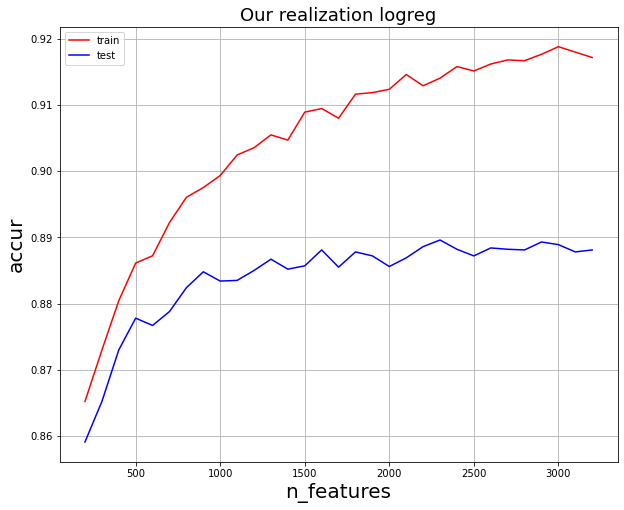

In [217]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(list_of_features, list_of_accur_train, color = 'r', label = 'train')
ax.plot(list_of_features, list_of_accur_test, color = 'b', label = 'test')
ax.set_ylabel('accur', size = 20)
ax.set_xlabel('n_features', size = 20)
ax.grid()
ax.legend()
#plt.xscale("log")
ax.set_title('Our realization logreg', size = 18)
plt.show()

In [222]:
list_time_true = np.diff(list_time)
list_time_true

array([ 61.49869084,  75.09337163,  86.27753925, 103.34907818,
       117.69691348, 126.21306062, 138.65777016, 147.34267282,
       159.48532224, 174.22571731, 187.58397079, 201.63277864,
       214.46745396, 237.62964392, 243.7098515 , 256.40898395,
       270.02221823, 281.82588196, 293.11390114, 306.3023603 ,
       321.56278086, 334.5541172 , 351.48508024, 355.72869635,
       378.23961449, 393.15551829, 403.50651407, 413.02065134,
       428.12172222, 452.85878778])

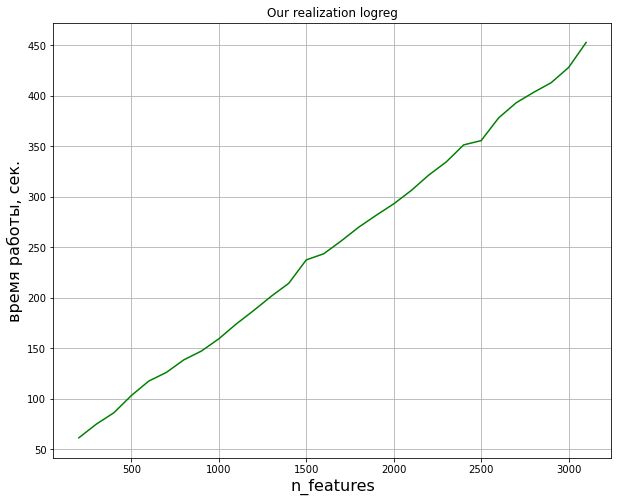

In [223]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(list_of_features[:-1], list_time_true, color = 'g')
ax.set_ylabel('время работы, сек.', size = 16)
ax.set_xlabel('n_features', size = 16)
ax.grid()
#plt.xscale("log")
ax.set_title('Our realization logreg')
#plt.savefig('C:/Users/User/Jupiter_notebook/task4_GB_nest_time1.pdf')
plt.show()

450 секунд - 7.5 минут

Видно, что в какой-то момент точность выходит на плато, а время работы линейно повышается

Из этого можно сделать вывод, что лучшие показатели получаются примерно при n_features = 1000 - 1500 признаков. 

При этих значениях у нас относительно хорошие показатели качества и при увеличении признаков качество улучшается незначительно относительно показателей времени

**3. сравнение моделей**

из прошлых экспериментов видно, что обе модели выдают примерно одинаковое качество, но SVM работал дольше, чем логистическая регрессия, его можно использовать, если нужен небольшой прирост к качеству и не так важны затраты по времени.